In [1]:
#10min standby (0.2930W), 10min 1min sync(0.1424W), 
#20min 10min sync(0.1118W), 40min 30min sync (0.1065W)

In [2]:
import time
import datetime as pydt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import pylab as P

%matplotlib inline

([<matplotlib.axis.YTick at 0x117fcbe90>,
 <a list of 4 Text yticklabel objects>)

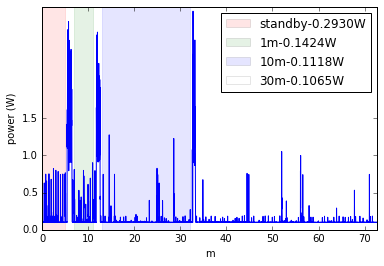

In [10]:
hw_df = pd.read_csv("dlog_oct15_none_1_10_30.csv", error_bad_lines=False) 

# voltage is measured in volts
# current is measured in amperes
hw_df['seconds'] = hw_df.time
hw_df['power'] = hw_df.voltage * hw_df.current
hw_df['hr'] = hw_df.seconds/3600.0
hw_df['m'] = hw_df.seconds/60.0

power_mean = np.mean(hw_df.power)

ax = hw_df.plot(x='m', y='power', label='baseline (avg power=%s)'% round(power_mean,4))

ax.set_ylabel("power (W)")

ax.axvspan(0, 5, alpha=0.1, color='red') 
ax.axvspan(7, 11, alpha=0.1, color='green')
ax.axvspan(13, 32, alpha=0.1, color='blue')
ax.axvspan(33, 75, alpha=0.1, color='white')

rect0 = Rectangle((0, 0), 1, 1, fc="r", alpha=0.1)
rect1 = Rectangle((0, 0), 1, 1, fc="g", alpha=0.1)
rect2 = Rectangle((0, 0), 1, 1, fc="b", alpha=0.1)
rect3 = Rectangle((0, 0), 1, 1, fc="w", alpha=0.1)

P.legend([rect0, rect1, rect2, rect3], ["standby-0.2930W", "1m-0.1424W", "10m-0.1118W", "30m-0.1065W"])

plt.yticks(np.arange(0, 2, 0.5))


In [5]:
power_df = hw_df

standby (no sync): power_mean1 = 0.293020886599


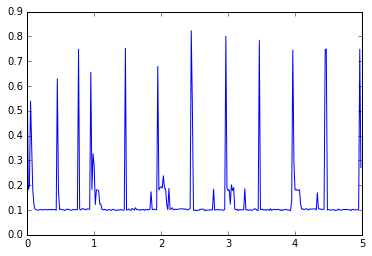

In [6]:
import numpy

x = power_df.m[power_df.m<5]
y = power_df.power[power_df.m<5]
import matplotlib.pyplot as plt
plt.plot(x, y)

power_mean1 = numpy.mean(power_df.power[power_df.m<10])
print "standby (no sync): power_mean1 = " + str(power_mean1)

1min sync: power_mean_video1 = 0.142449347846


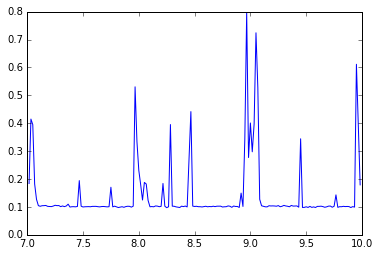

In [7]:
import numpy

x = power_df.m[(power_df.m>7) & (power_df.m<10) ]
y = power_df.power[(power_df.m>7) & (power_df.m<10)]
import matplotlib.pyplot as plt
plt.plot(x, y)

power_mean_video1 = numpy.mean(power_df.power[(power_df.m>7) & (power_df.m<11)])
print "1min sync: power_mean_video1 = " + str(power_mean_video1)
power_df_1min = power_df[(power_df.m>7) & (power_df.m<11)]
power_df_1min.to_csv("dlog_1min_sync.csv")

10min sync: power_mean_video1 = 0.111795044895


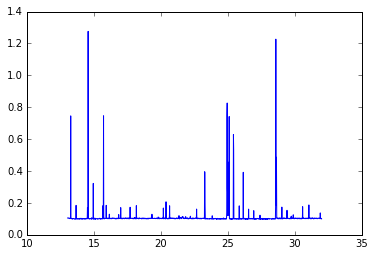

In [8]:
import numpy

x = power_df.m[(power_df.m>13) & (power_df.m<32) ]
y = power_df.power[(power_df.m>13) & (power_df.m<32)]
import matplotlib.pyplot as plt
plt.plot(x, y)

power_mean_video1 = numpy.mean(power_df.power[(power_df.m>13) & (power_df.m<32)])
print "10min sync: power_mean_video1 = " + str(power_mean_video1)

power_df_1min = power_df[(power_df.m>13) & (power_df.m<32)]
power_df_1min.to_csv("dlog_10min_sync.csv")

30min sync: power_mean_video1 = 0.106523984389


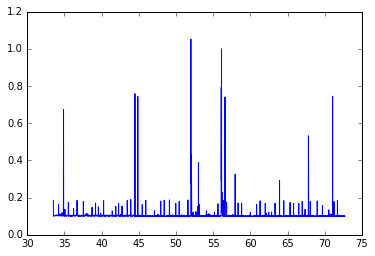

In [9]:
import numpy

x = power_df.m[(power_df.m>33.5) ]
y = power_df.power[(power_df.m>33.5) ]
import matplotlib.pyplot as plt
plt.plot(x, y)

power_mean_video1 = numpy.mean(power_df.power[(power_df.m>33.5) ])
print "30min sync: power_mean_video1 = " + str(power_mean_video1)

power_df_1min = power_df[(power_df.m>33.5)]
power_df_1min.to_csv("dlog_30min_sync.csv")

In [ ]:
ratio = (power_mean_video1+power_mean_video2)/2/((power_mean1+power_mean2+power_mean3)/3)
print "ratio between standby / video = " + str(ratio)